# Imports

In [94]:
# Data
import pandas as pd
import numpy as np

# Time
from datetime import datetime

# Ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from interpret import show
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

# Black Box Models
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Glass Box Models
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import Lasso
# from lineartree import LinearTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Tuning
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# Metrics 
from sklearn.metrics import mean_squared_error

# XAI
from sklearn.inspection import permutation_importance
from interpret.blackbox import LimeTabular
import shap 
import lime.lime_tabular

# AutoML
from autogluon.tabular import TabularDataset, TabularPredictor
# import h2o
# from h2o.automl import H2OAutoML

# Other 
import pickle
from scipy import optimize


# Data

In [2]:
df_artists = pd.read_csv("artists.csv")

In [3]:
df_artists = df_artists.rename(columns = {"popularity" : "artist_popularity", "id" : "artist_id", "name": "artist_name", "followers" : "artist_followers"})

In [93]:
df_artists

artist_id  artist_followers                 genres  \
0        0DheY5irMjBUeLybbCUEZ2               0.0                     []   
1        0DlhY15l3wsrnlfGio2bjU               5.0                     []   
2        0DmRESX2JknGPQyO15yxg7               0.0                     []   
3        0DmhnbHjm1qw6NCYPeZNgJ               0.0                     []   
4        0Dn11fWM7vHQ3rinvWEl4E               2.0                     []   
...                         ...               ...                    ...   
1104344  6rJIG42vcWAf1UBdRFlQxB            3345.0                     []   
1104345  1ljurfXKPlGncNdW3J8zJ8            2123.0  ['deep acoustic pop']   
1104346  2vnT9YhKIvjVo9LnVjWmr2              26.0                     []   
1104347  3ID0E5XCvnJIYZEq043ZoB             406.0                     []   
1104348  5m0Y4WSYyai2BU752lCASy             146.0                     []   

                                            artist_name  artist_popularity  
0        Armid & Amir Zare Pashai feat. Sara Rouzbehani                  0  
1                                           ปูนา ภาวิณี                  0  
2                                                 Sadaa                  0  
3                                             Tra'gruda                  0  
4                                Ioannis Panoutsopoulos                  0  
...                                                 ...                ...  
1104344                                      Cody Longo                  8  
1104345                                 Right the Stars                 18  
1104346                                  Jesse Giddings                  0  
1104347                            The Boy Band Project                  0  
1104348                                      10 Reasons                  1  

[1104349 rows x 5 columns]

In [5]:
df_song = pd.read_csv("tracks.csv")

In [6]:
df_song.shape


(586672, 20)

In [7]:
df_song.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

In [8]:
df_song.sort_values(by = "popularity", ascending= False).head()

id                                    name  \
93802  4iJyoBOLtHqaGxP12qzhQI  Peaches (feat. Daniel Caesar & Giveon)   
93803  7lPN2DXiMsVn7XUKtOW1CS                         drivers license   
93804  3Ofmpyhv5UAQ70mENzB277                  Astronaut In The Ocean   
92810  5QO79kh1waicV47BqGRL3g                         Save Your Tears   
92811  6tDDoYIxWvMLTdKpjFkc1B                               telepatía   

       popularity  duration_ms  explicit  \
93802         100       198082         1   
93803          99       242014         1   
93804          98       132780         0   
92810          97       215627         1   
92811          97       160191         0   

                                            artists  \
93802  ['Justin Bieber', 'Daniel Caesar', 'Giveon']   
93803                            ['Olivia Rodrigo']   
93804                               ['Masked Wolf']   
92810                                ['The Weeknd']   
92811                                ['Kali Uchis']   

                                              id_artists release_date  \
93802  ['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...   2021-03-19   
93803                         ['1McMsnEElThX1knmY4oliG']   2021-01-08   
93804                         ['1uU7g3DNSbsu0QjSEqZtEd']   2021-01-06   
92810                         ['1Xyo4u8uXC1ZmMpatF05PJ']   2020-03-20   
92811                         ['1U1el3k54VvEUzo3ybLPlM']   2020-12-04   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
93802         0.677   0.696    0    -6.181     1       0.1190        0.3210   
93803         0.585   0.436   10    -8.761     1       0.0601        0.7210   
93804         0.778   0.695    4    -6.865     0       0.0913        0.1750   
92810         0.680   0.826    0    -5.487     1       0.0309        0.0212   
92811         0.653   0.524   11    -9.016     0       0.0502        0.1120   

       instrumentalness  liveness  valence    tempo  time_signature  
93802          0.000000     0.420    0.464   90.030               4  
93803          0.000013     0.105    0.132  143.874               4  
93804          0.000000     0.150    0.472  149.996               4  
92810          0.000012     0.543    0.644  118.051               4  
92811          0.000000     0.203    0.553   83.970               4

In [9]:
df_song["name"].value_counts()

Summertime                                  101
Intro                                        92
Year 3000                                    91
Hold On                                      87
2000 Years                                   76
                                           ... 
0024 - und die silberne Spinne - Teil 31      1
בוקר של קרנבל                                 1
0024 - und die silberne Spinne - Teil 30      1
Disguise                                      1
A Day At A Time                               1
Name: name, Length: 446474, dtype: int64

In [10]:
df_song.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [11]:
artists_id = df_song["id_artists"]
artist_id = [l.strip('"]["').split(', ')[0] for l in artists_id]
artist_id = [l.replace("'", "") for l in artist_id]

df_song["artist_id"] = artist_id

In [12]:
df_song.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450  ...   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630  ...   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770  ...   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946  ...   -27.961     1       0.0504   
4         1922         0.402  0.1580  ...   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0         0.674            0.7440     0.151    0.127  104.851               3   
1         0.797            0.0000     0.148    0.655  102.009               1   
2         0.994            0.0218     0.212    0.457  130.418               5   
3         0.995            0.9180     0.104    0.397  169.980               3   
4         0.989            0.1300     0.311    0.196  103.220               4   

                artist_id  
0  45tIt06XoI0Iio4LBEVpls  
1  14jtPCOoNZwquk5wd9DxrY  
2  5LiOoJbxVSAMkBS2fUm3X2  
3  5LiOoJbxVSAMkBS2fUm3X2  
4  3BiJGZsyX9sJchTqcSA7Su  

[5 rows x 21 columns]

In [13]:
df = df_song.merge(df_artists, on = "artist_id", how = "left")
df.shape

(586672, 25)

In [14]:
df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  instrumentalness  liveness  \
0   1922-02-22         0.645  0.4450  ...            0.7440     0.151   
1   1922-06-01         0.695  0.2630  ...            0.0000     0.148   
2   1922-03-21         0.434  0.1770  ...            0.0218     0.212   
3   1922-03-21         0.321  0.0946  ...            0.9180     0.104   
4         1922         0.402  0.1580  ...            0.1300     0.311   

   valence    tempo  time_signature               artist_id  artist_followers  \
0    0.127  104.851               3  45tIt06XoI0Iio4LBEVpls              91.0   
1    0.655  102.009               1  14jtPCOoNZwquk5wd9DxrY               3.0   
2    0.457  130.418               5  5LiOoJbxVSAMkBS2fUm3X2            3528.0   
3    0.397  169.980               3  5LiOoJbxVSAMkBS2fUm3X2            3528.0   
4    0.196  103.220               4  3BiJGZsyX9sJchTqcSA7Su           11327.0   

                                              genres      artist_name  \
0                                                 []              Uli   
1                                                 []  Fernando Pessoa   
2                         ['tango', 'vintage tango']  Ignacio Corsini   
3                         ['tango', 'vintage tango']  Ignacio Corsini   
4  ['adult standards', 'big band', 'easy listenin...      Dick Haymes   

   artist_popularity  
0                4.0  
1                0.0  
2               23.0  
3               23.0  
4               35.0  

[5 rows x 25 columns]

In [15]:
df["genres"].value_counts()

[]                                                                                   48692
['hoerspiel']                                                                         8174
['tango', 'vintage tango']                                                            2644
['classic bollywood', 'desi pop', 'filmi', 'sufi']                                    2357
['classical', 'classical era']                                                        2109
                                                                                     ...  
['exotica', 'lounge', 'moog', 'vintage french electronic', 'zolo']                       1
['country boogie', 'rockabilly', 'western swing']                                        1
['lo-fi cover', 'slap house']                                                            1
['alt z', 'contemporary country']                                                        1
['alt z', 'alternative r&b', 'bedroom pop', 'indie cafe pop', 'indie pop', 'pop']        1

In [16]:
dates = df["release_date"]

In [17]:
dates_type = [len(l.split("-")) for l in dates]

In [18]:
# Number of dates that are just year
dates_type.count(1)

136489

In [19]:
# Number of dates that are spesific dates
dates_type.count(3)

448081

In [20]:
release_year = [int(l.split("-")[0]) for l in dates]
df["release_year"] = release_year

## Variable Selection

In [74]:
response = "popularity"

cat_cols = list(df.select_dtypes(exclude="number").columns)
num_cols = list(df.select_dtypes(include="number").columns)

num_cols.remove(response)

cat_cols.remove("name") # Song has too few unique values
cat_cols.remove("id")
cat_cols.remove("id_artists")
cat_cols.remove("artist_id")
cat_cols.remove("artists")
cat_cols.remove("release_date")

# Without artist predictos
# cat_cols.remove("artist_name")
cat_cols.remove("genres")

num_cols.remove("artist_followers")
num_cols.remove("artist_popularity")

# Without year 
# num_cols.remove("release_year")


predictors = cat_cols + num_cols

In [66]:
X = df.copy()
y = X.pop(response)
X = X[num_cols]

 
mutal_info_reg = mutual_info_regression(X, y)

ValueError: Input X contains NaN.

In [ ]:
mt_table = pd.Series()
for i in range(len(num_cols)):
    mt_table[num_cols[i]] =  mutal_info_reg[i]
mt_table

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


duration_ms         0.069442
explicit            0.021414
danceability        0.019270
energy              0.067358
key                 0.007055
loudness            0.078085
mode                0.001369
speechiness         0.036194
acousticness        0.126969
instrumentalness    0.047532
liveness            0.008441
valence             0.007432
tempo               0.049482
time_signature      0.008276
release_year        0.403612
dtype: float64

Every predictor looks quite bad at predictiong popularity. Might drop key, mode, liveness and valandce, since these are espacially bad.

In [24]:
df_predictors = df[predictors + [response]]

In [25]:
df_train, df_test = train_test_split(df_predictors, test_size = 0.2, random_state = 42)

In [27]:
df_train.to_csv("train.csv", index = False)
df_test.to_csv("test.csv", index = False)

# AutoML

## AutoGluon

In [29]:
train_data = TabularDataset("train.csv")
test_data = TabularDataset("test.csv")

In [30]:
gluon_model = TabularPredictor(label = response, problem_type="regression")

gluon_predictor = gluon_model.fit(train_data=train_data, time_limit= 5*60)

No path specified. Models will be saved in: "AutogluonModels\ag-20230222_073839\"
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels\ag-20230222_073839\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    469337
Train Data Columns: 14
Label Column: popularity
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    472.97 MB
	Train Data (Original)  Memory Usage: 52.57 MB (11.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 

[1000]	valid_set's rmse: 14.9227


Available Memory: 462 MB
Estimated GBM model size: 3 MB
	-14.8654	 = Validation score   (-root_mean_squared_error)
	46.01s	 = Training   runtime
	0.89s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 228.48s of the 228.43s of remaining time.
Available Memory: 394 MB
Estimated GBM model size: 0 MB
	-18.2454	 = Validation score   (-root_mean_squared_error)
	1.0s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 227.46s of the 227.41s of remaining time.
	Not enough memory to train RandomForestMSE... Skipping this model.
Fitting model: CatBoost ... Training model for up to 227.22s of the 227.17s of remaining time.
Available Memory: 233 MB, Estimated Model size: 69 MB
	Ran low on memory, early stopping on iteration 1.
	-18.2735	 = Validation score   (-root_mean_squared_error)
	1.21s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 225.98s of the 

In [31]:
gluon_preds = gluon_model.predict(test_data)

In [32]:
y_test = test_data[response]
auto_rmse = round(np.sqrt(mean_squared_error(y_test, gluon_preds)),2)
auto_rmse

14.51

## XAI 

In [42]:
best_gluon_model = pickle.load(open("AutogluonModels/ag-20230222_073839/models/WeightedEnsemble_L2/model.pkl", "rb"))

In [44]:
type(best_gluon_model)

autogluon.core.models.ensemble.weighted_ensemble_model.WeightedEnsembleModel

### H2O

In [ ]:
h2o.init()

# Preprocessing

In [75]:
X_full = df.copy()

In [76]:
ssc = StandardScaler()
ssc.fit(X_full[num_cols])
X_full[num_cols] = ssc.transform(X_full[num_cols])

X_full.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0    -0.815233 -0.214754              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1    -1.042088 -0.214754  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2    -0.382618 -0.214754  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3    -0.420026 -0.214754  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4    -0.529308 -0.214754      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability    energy  ...  liveness   valence     tempo  \
0   1922-02-22      0.490096 -0.385182  ... -0.341434 -1.650527 -0.457392   
1   1922-06-01      0.791115 -1.107625  ... -0.357710  0.398600 -0.552876   
2   1922-03-21     -0.780204 -1.449000  ... -0.010498 -0.369823  0.401596   
3   1922-03-21     -1.460507 -1.776084  ... -0.596418 -0.602678  1.730782   
4         1922     -0.972856 -1.524420  ...  0.526596 -1.382743 -0.512190   

   time_signature               artist_id  artist_followers  \
0       -1.845842  45tIt06XoI0Iio4LBEVpls              91.0   
1       -6.072724  14jtPCOoNZwquk5wd9DxrY               3.0   
2        2.381040  5LiOoJbxVSAMkBS2fUm3X2            3528.0   
3       -1.845842  5LiOoJbxVSAMkBS2fUm3X2            3528.0   
4        0.267599  3BiJGZsyX9sJchTqcSA7Su           11327.0   

                                              genres      artist_name  \
0                                                 []              Uli   
1                                                 []  Fernando Pessoa   
2                         ['tango', 'vintage tango']  Ignacio Corsini   
3                         ['tango', 'vintage tango']  Ignacio Corsini   
4  ['adult standards', 'big band', 'easy listenin...      Dick Haymes   

   artist_popularity  release_year  
0                4.0     -2.915571  
1                0.0     -2.915571  
2               23.0     -2.915571  
3               23.0     -2.915571  
4               35.0     -2.915571  

[5 rows x 26 columns]

In [77]:
for col in X_full.columns:
    if col in cat_cols:
        print(col)
        lbl = LabelEncoder()
        lbl.fit(list(X_full[col].values))
        X_full[col] = lbl.transform(list(X_full[col].values))


artist_name


In [78]:
X_full.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0    -0.815233 -0.214754              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1    -1.042088 -0.214754  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2    -0.382618 -0.214754  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3    -0.420026 -0.214754  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4    -0.529308 -0.214754      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability    energy  ...  liveness   valence     tempo  \
0   1922-02-22      0.490096 -0.385182  ... -0.341434 -1.650527 -0.457392   
1   1922-06-01      0.791115 -1.107625  ... -0.357710  0.398600 -0.552876   
2   1922-03-21     -0.780204 -1.449000  ... -0.010498 -0.369823  0.401596   
3   1922-03-21     -1.460507 -1.776084  ... -0.596418 -0.602678  1.730782   
4         1922     -0.972856 -1.524420  ...  0.526596 -1.382743 -0.512190   

   time_signature               artist_id  artist_followers  \
0       -1.845842  45tIt06XoI0Iio4LBEVpls              91.0   
1       -6.072724  14jtPCOoNZwquk5wd9DxrY               3.0   
2        2.381040  5LiOoJbxVSAMkBS2fUm3X2            3528.0   
3       -1.845842  5LiOoJbxVSAMkBS2fUm3X2            3528.0   
4        0.267599  3BiJGZsyX9sJchTqcSA7Su           11327.0   

                                              genres  artist_name  \
0                                                 []        57262   
1                                                 []        17596   
2                         ['tango', 'vintage tango']        23273   
3                         ['tango', 'vintage tango']        23273   
4  ['adult standards', 'big band', 'easy listenin...        13383   

   artist_popularity  release_year  
0                4.0     -2.915571  
1                0.0     -2.915571  
2               23.0     -2.915571  
3               23.0     -2.915571  
4               35.0     -2.915571  

[5 rows x 26 columns]

In [79]:
X_full.isnull().sum()

id                       0
name                    71
popularity               0
duration_ms              0
explicit                 0
artists                  0
id_artists               0
release_date             0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
artist_id                0
artist_followers     12416
genres               12415
artist_name              0
artist_popularity    12415
release_year             0
dtype: int64

In [80]:
X_full["artist_name"] = X_full["artist_name"].astype("category")

Sample a fraction of the data to test models. Use full data when making final model

In [81]:
# X_sub = X_full.sample(frac = 0.1, ignore_index = True, random_state=42)
X_sub = X_full.copy()

Can also have a large test data set to reduce time and make error estimate better. This reduces the quality of the model obviously

In [82]:
y = X_sub[response]
X = X_sub[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

X_train = pd.DataFrame(np.array(X_train), columns = X_train.columns)
X_test = pd.DataFrame(np.array(X_test), columns = X_test.columns)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [33]:
df_sub = X_sub[predictors + [response]]

df_train, df_test = train_test_split(df_sub, test_size= 0.2, random_state = 42)

In [34]:
df_train.to_csv("train_processed.csv", index = False)

df_test.to_csv("test_processed.csv", index = False)

In [35]:
df_train.columns

Index(['artist_name', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'release_year', 'popularity'],
      dtype='object')

In [36]:
X_train.head()

duration_ms  explicit  danceability    energy  loudness  speechiness  \
431626    -0.182715 -0.214754      0.821217 -0.623350 -0.742915    -0.410598   
481382    -0.525198 -0.214754      0.441933  1.178790  1.130222    -0.391698   
41728     -0.638376 -0.214754      0.423872  0.174514  0.119675    -0.360568   
419851     0.009775 -0.214754      1.543662  1.079553  0.956525    -0.362236   
172826     0.505421 -0.214754     -1.617036  1.663066  1.100552    -0.028703   

        acousticness  instrumentalness  liveness   valence     tempo  
431626      0.785862         -0.425111 -0.832414  0.476218 -0.948252  
481382      0.103594         -0.425120 -0.162403  0.996262 -1.038495  
41728       0.476261         -0.424524  1.671310  1.209713  0.162046  
419851     -1.232849         -0.425108 -0.211230  1.485258  0.724099  
172826     -1.289541          2.085488 -0.059325 -1.382743  0.618771

# Visualization

## Response

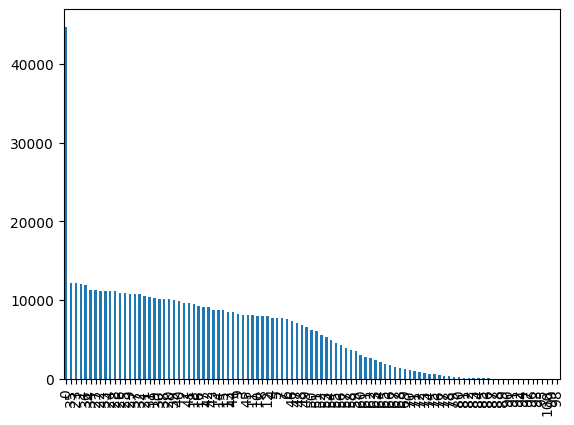

In [32]:
df[response].value_counts().plot(kind = "bar")
plt.show()

## Categorical Variable

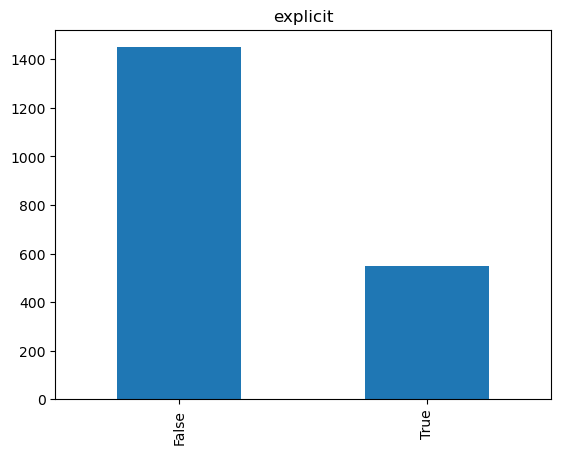

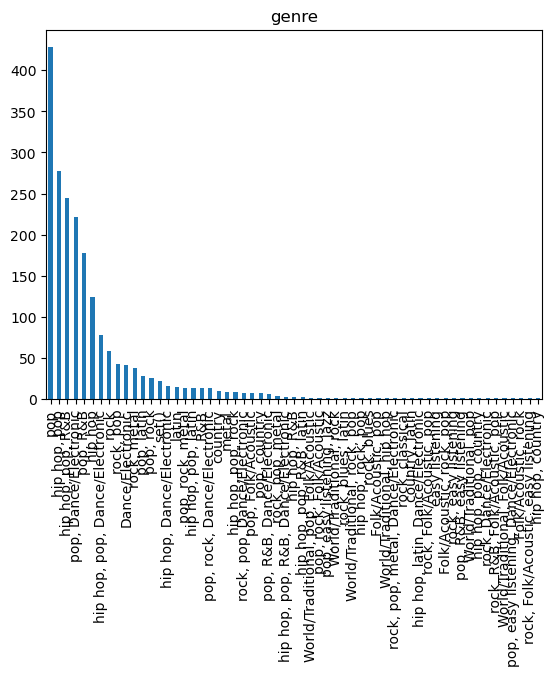

In [30]:
for var in cat_cols_plot:
    plt.title(var)
    df[var].value_counts().plot(kind = "bar")
    plt.show()

## Numerical Variables

In [58]:
sns.pairplot(X, vars =['duration_ms',
 'danceability',
 'energy',
 'loudness','speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo'])

: 

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


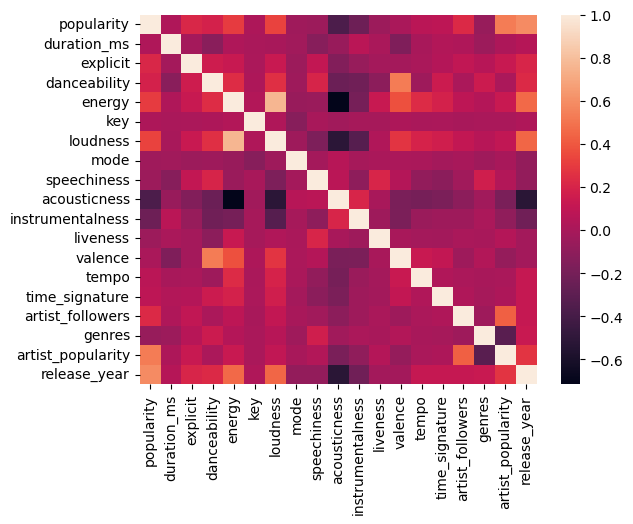

In [41]:
sns.heatmap(X_full.corr())
plt.show()

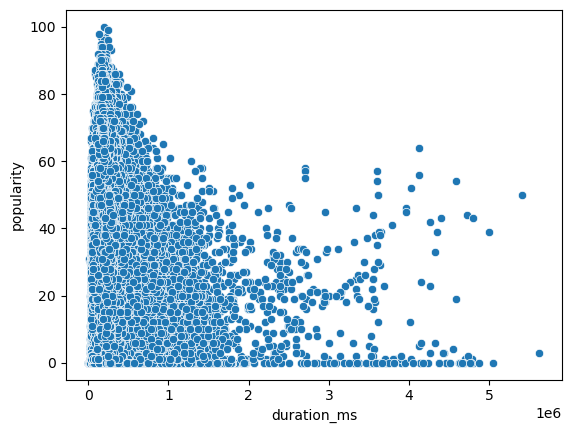

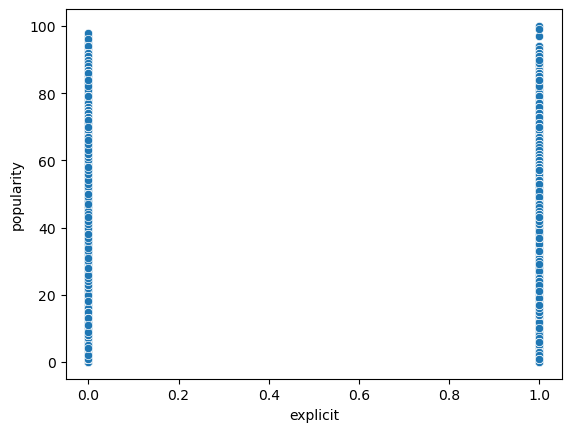

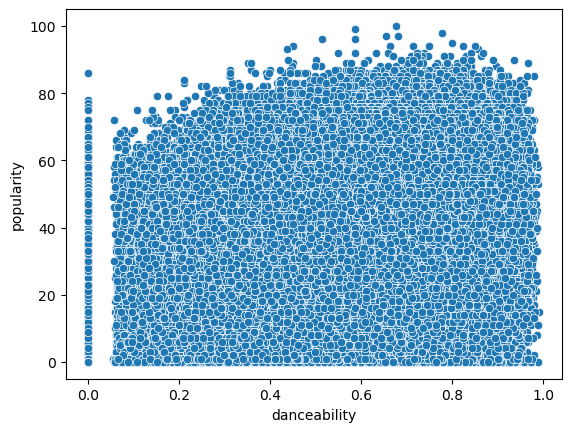

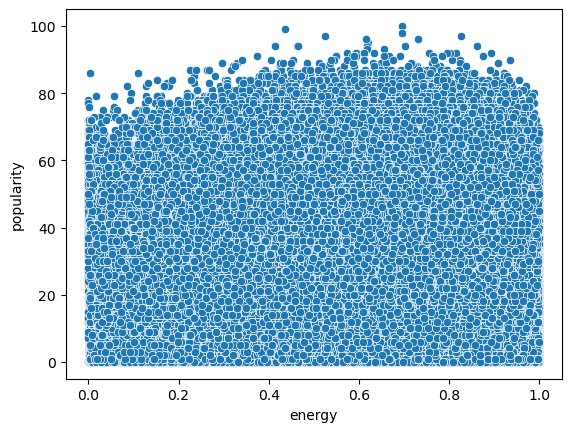

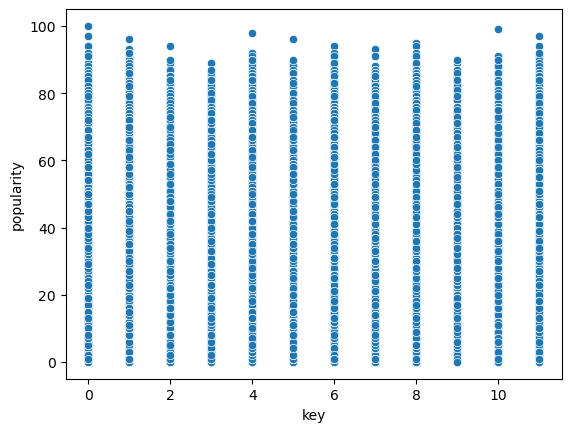

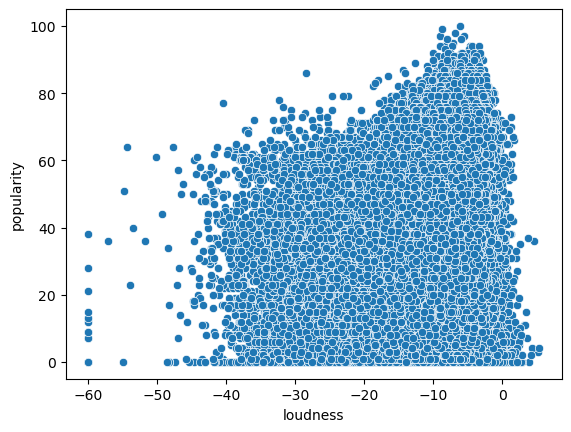

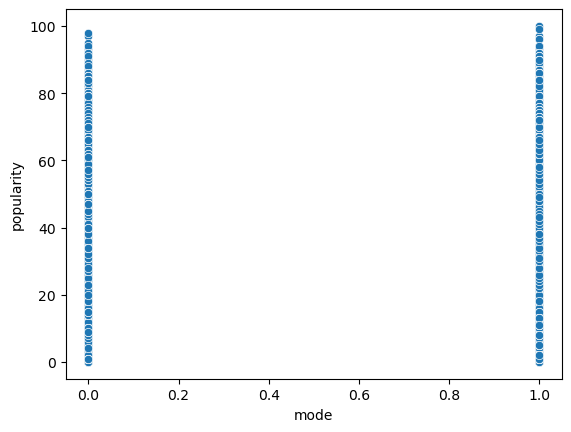

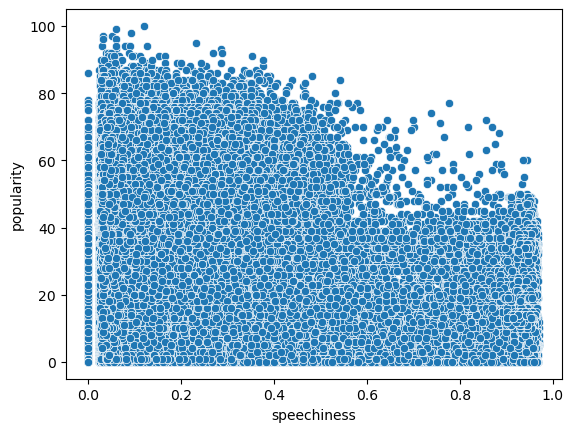

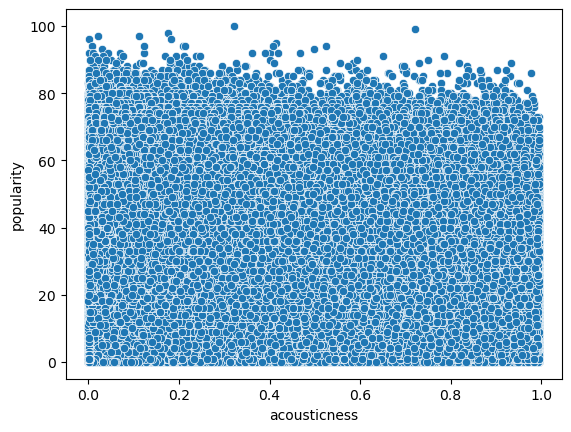

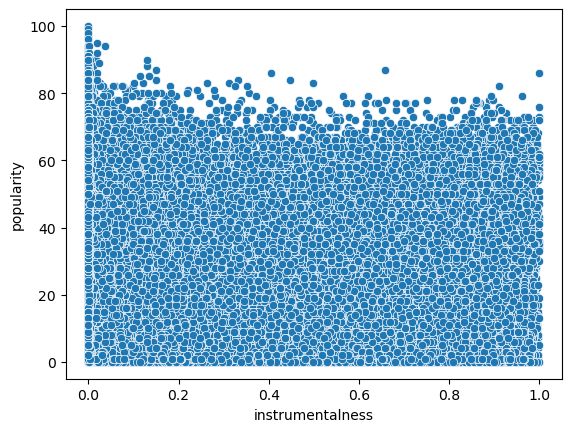

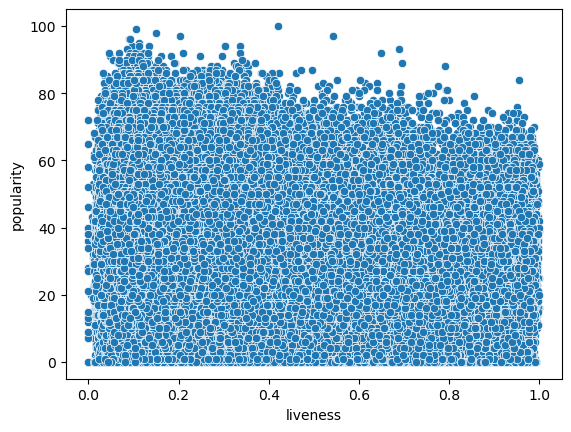

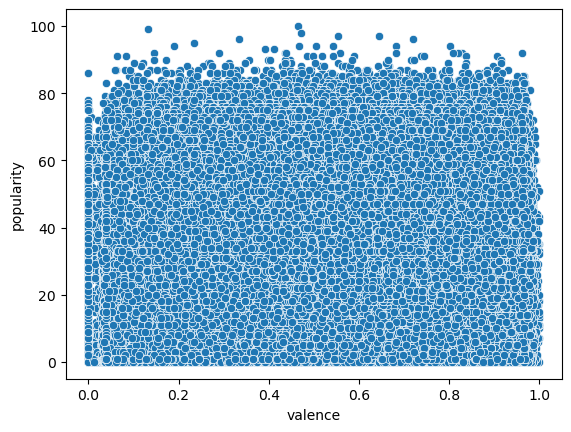

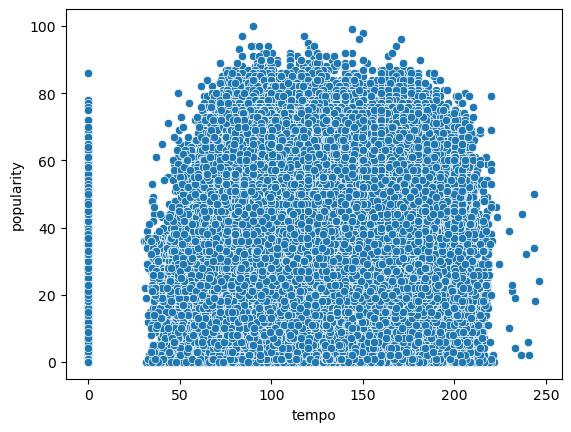

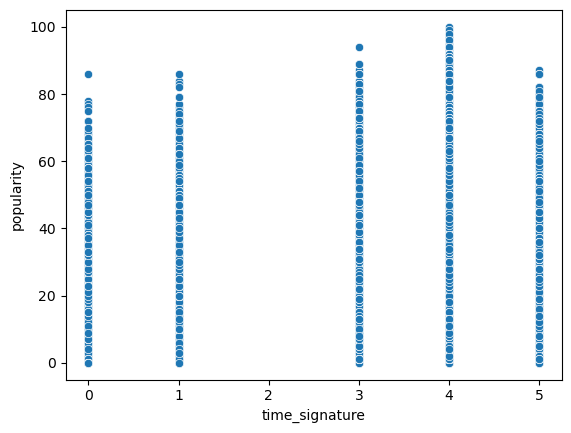

In [32]:
for var in num_cols:
    sns.scatterplot(data = df, x = var, y = response)
    plt.show()

# Lowess

In [29]:
lowess = sm.nonparametric.lowess

In [47]:
X_sub = X_full.sample(n = 100000)
# X_sub = X_full.copy()

In [48]:
X_sub.shape

(100000, 26)

In [49]:
y = X_sub[response]
X_sub = X_sub.drop(columns=response)

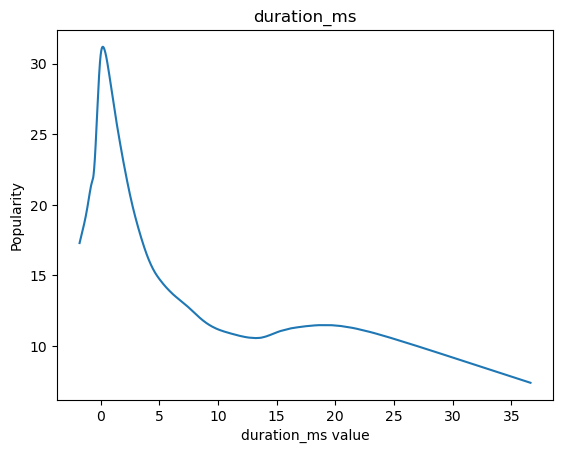

invalid value encountered in divide


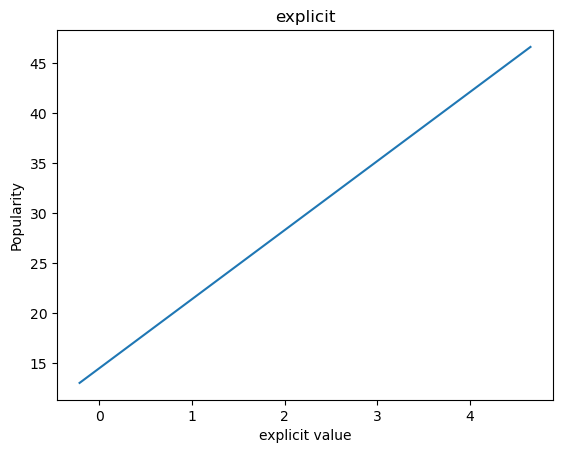

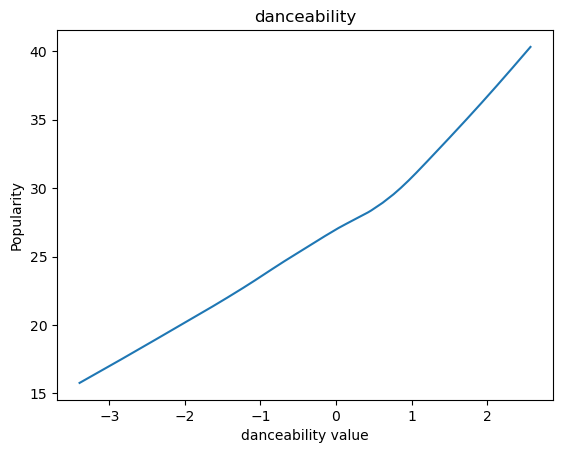

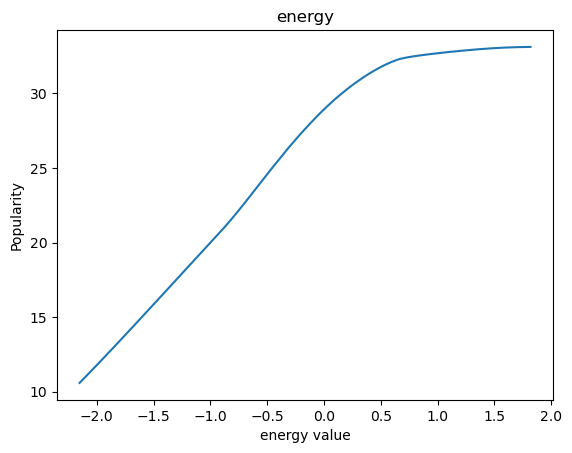

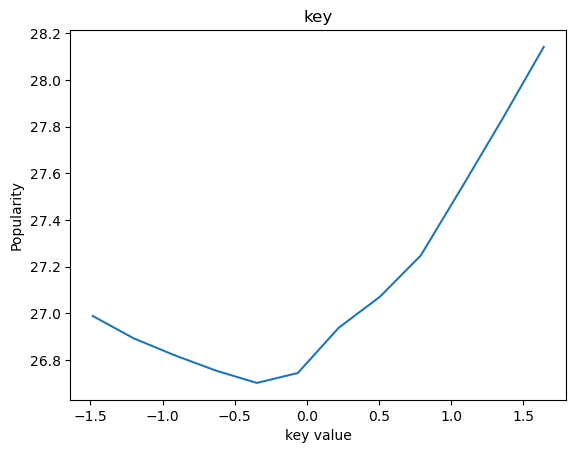

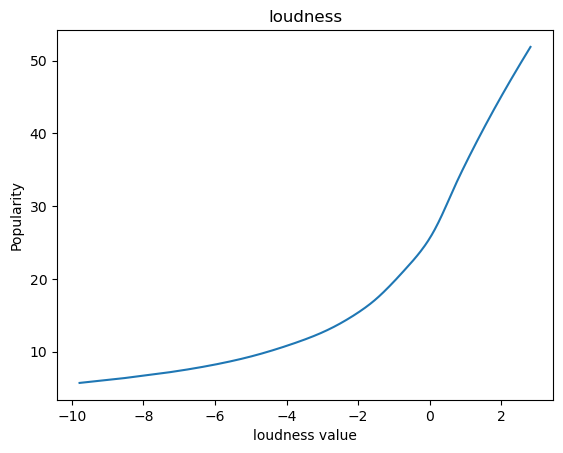

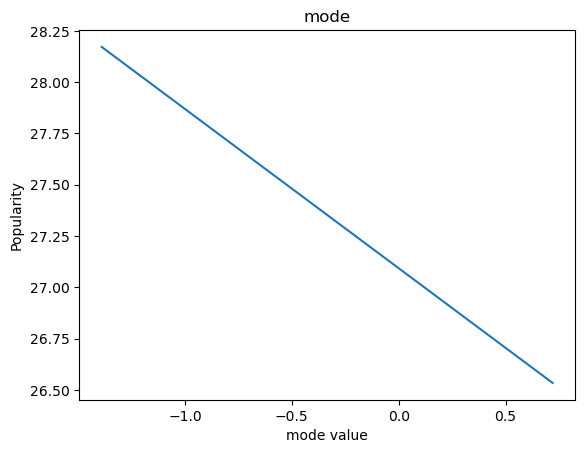

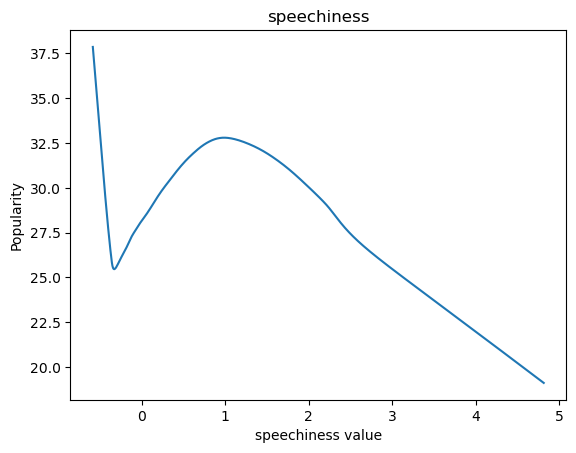

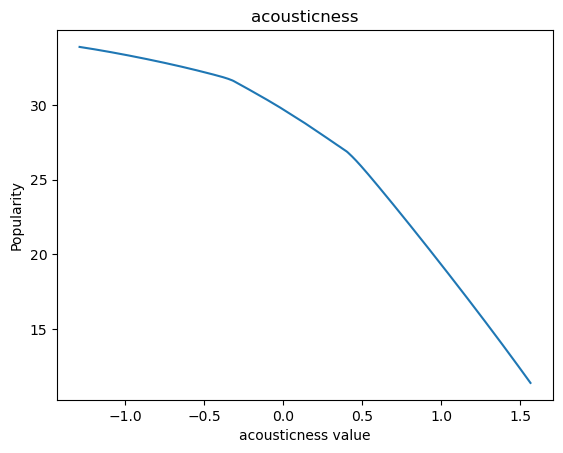

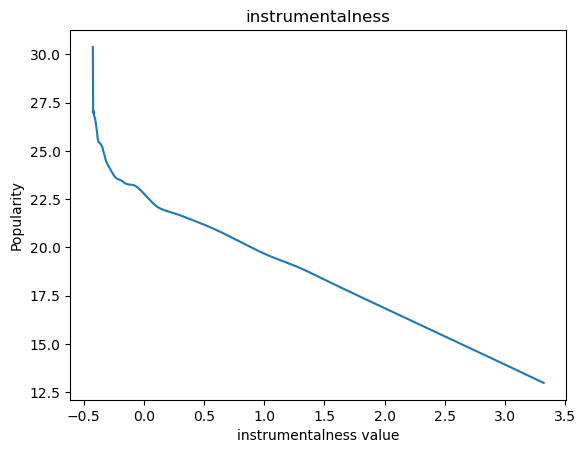

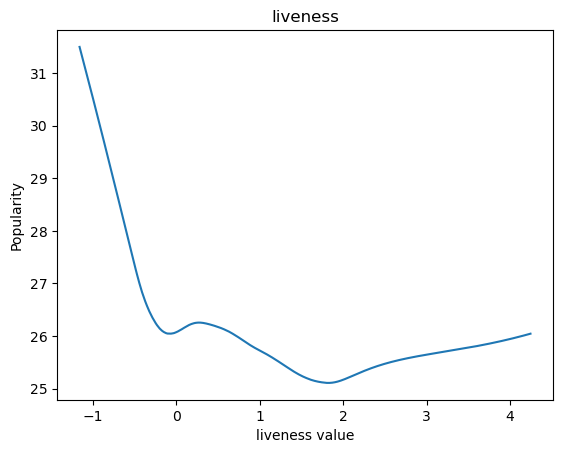

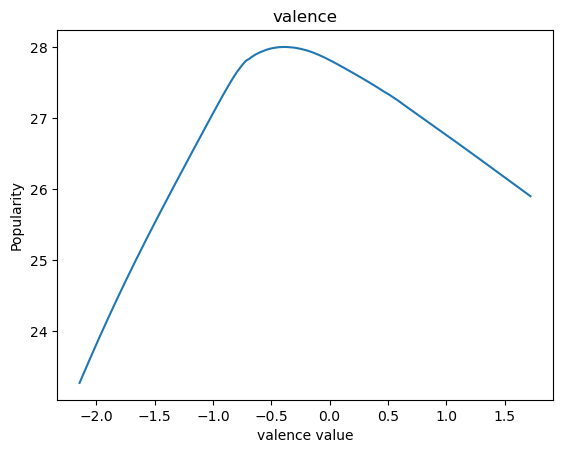

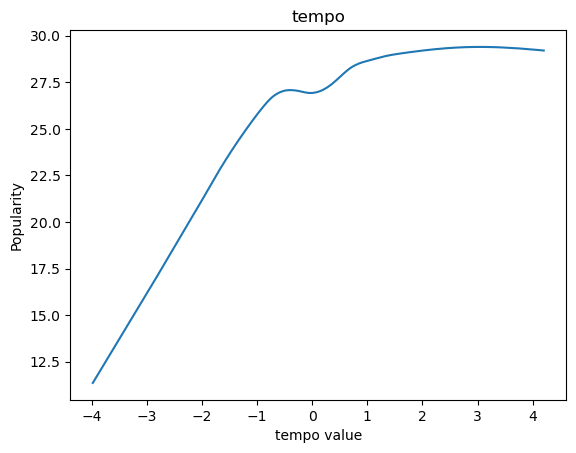

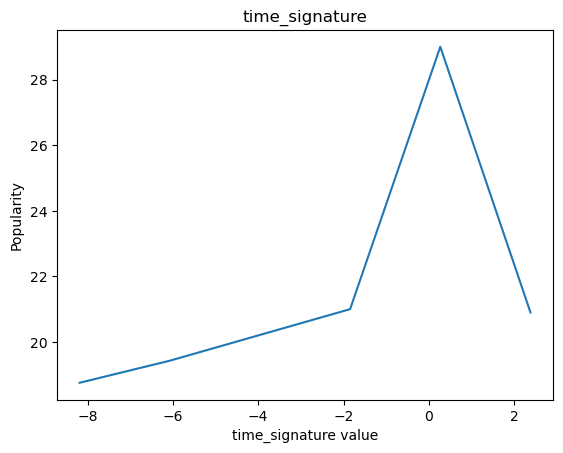

In [50]:
re_weightings = 1 # Base 3
fraction_of_data = 2./3 # Base 2./3

for var in num_cols:
    exog = X_sub[var]
    delta =  0.0001*(exog.max() - exog.min()) # Base 0
    y_hat = lowess(y, exog = exog, it = re_weightings, frac = fraction_of_data, delta = delta)
    
    plt.plot(y_hat[:,0], y_hat[:,1])
    plt.title(var)
    plt.ylabel("Popularity")
    plt.xlabel(f"{var} value")
    plt.show()

# Black Box Modeling


## AutoGluon

In [145]:
train_data = TabularDataset("train_processed.csv")
test_data = TabularDataset("test_processed.csv")

Loaded data from: train_processed.csv | Columns = 15 / 15 | Rows = 469337 -> 469337
Loaded data from: test_processed.csv | Columns = 15 / 15 | Rows = 117335 -> 117335


In [146]:
gluon_model = TabularPredictor(label = response, problem_type="regression")

gluon_predictor = gluon_model.fit(train_data=train_data, time_limit = 60*60)

No path specified. Models will be saved in: "AutogluonModels\ag-20230221_204237\"
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels\ag-20230221_204237\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    469337
Train Data Columns: 14
Label Column: popularity
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5104.36 MB
	Train Data (Original)  Memory Usage: 52.57 MB (1.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3

[1000]	valid_set's rmse: 14.6685
[2000]	valid_set's rmse: 14.5816
[3000]	valid_set's rmse: 14.5337
[4000]	valid_set's rmse: 14.5035
[5000]	valid_set's rmse: 14.4831
[6000]	valid_set's rmse: 14.4609
[7000]	valid_set's rmse: 14.4466
[8000]	valid_set's rmse: 14.4299
[9000]	valid_set's rmse: 14.4179
[10000]	valid_set's rmse: 14.4016


	-14.4016	 = Validation score   (-root_mean_squared_error)
	126.25s	 = Training   runtime
	1.94s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1040.18s of the 1040.17s of remaining time.


[1000]	valid_set's rmse: 14.5966
[2000]	valid_set's rmse: 14.4966
[3000]	valid_set's rmse: 14.4636
[4000]	valid_set's rmse: 14.4461
[5000]	valid_set's rmse: 14.4228
[6000]	valid_set's rmse: 14.4148
[7000]	valid_set's rmse: 14.4001
[8000]	valid_set's rmse: 14.3838
[9000]	valid_set's rmse: 14.3756
[10000]	valid_set's rmse: 14.3751


	-14.3744	 = Validation score   (-root_mean_squared_error)
	109.28s	 = Training   runtime
	1.76s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 927.92s of the 927.92s of remaining time.
	-14.3669	 = Validation score   (-root_mean_squared_error)
	867.56s	 = Training   runtime
	0.35s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 57.82s of the 57.81s of remaining time.
	Ran out of time, early stopping on iteration 596.
	-14.723	 = Validation score   (-root_mean_squared_error)
	58.15s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the -0.53s of remaining time.
	-14.2154	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1201.38s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModel

In [147]:
gluon_preds = gluon_model.predict(test_data)

In [148]:
y_test = test_data[response]
auto_rmse = round(np.sqrt(mean_squared_error(y_test, gluon_preds)), 2)
auto_rmse

14.26

## XGBoost

In [83]:
xgb_model = xgb.XGBRegressor(
    n_estimators = 1000,
    learning_rate =  0.05,
    n_jobs = -1
    )

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
xgb_preds = xgb_model.predict(X_test)

In [85]:
xgb_rmse = round(np.sqrt(mean_squared_error(y_test, xgb_preds)), 2)
print("Mean Squared Error:", xgb_rmse)

Mean Squared Error: 11.86


Popularity: 10..56

Followers: 10.56

Artist name: 11.86

In [ ]:
np.savetxt("xgb_preds.csv", xgb_preds)

### Tuning

In [106]:
xgb_opt = BayesSearchCV(
    xgb.XGBRegressor(),
    {
        # "learning_rate" : Real(1e-3, 0.3),
        # "max_depth" : Integer(3, 10),
        # "gamma" : Real(0, 10),
        
    },
    n_iter= 10,
    random_state=42,
    verbose=1
)

xgb_opt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
              n_iter=10, random_state=42,
              search_spaces={'gamma': Real(low=0, high=10, prior='uniform', transform='normalize')},
              verbose=1)

In [107]:
xgb_opt.best_params_

OrderedDict([('gamma', 6.170793585023163)])

Best learning rate:  0.124, Best max depth: 3, Best gamma: 6.17

In [46]:
# Completely random prediction (worste case)
rand_preds = np.random.uniform(low = 0, high = 100, size = len(y_test))

In [47]:
round(np.sqrt(mean_squared_error(y_test, rand_preds)),2)

1668.3729993664283

So the model is better than random guessing. Try to use mean of training data as predictor. This uses no predictors

In [48]:
# Mean prediction
mean = np.mean(y_train)

mean_preds = np.repeat(mean, len(y_test))

In [49]:
round(np.sqrt(mean_squared_error(y_test, mean_preds)),2)

334.6183864004297

### Explaination

In [86]:
model = xgb_model

#### LIME

In [98]:
index = 1

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names = predictors,
    mode = "regression",
)

lime_local = lime.explain_local(X_test[5:], 
                                y_test[5:],
                                name = "LIME")

exp = explainer.explain_instance(X_test[index], model.predict, num_features = len(predictors))

exp.show_in_notebook(show_table = True)

InvalidIndexError: (slice(None, None, None), 0)

#### SHAP

In [90]:
model = xgb_model

In [91]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


##### Local

In [72]:
shap.initjs()

prediction = model.predict(X_test)
index = 3 # Index of data point where we give a local explenation


print(f"The RF predicted: {prediction[index]}")
shap.force_plot(explainer.expected_value,
                shap_values[index],
                X_test.iloc[index]) # for values

The RF predicted: 13.345699310302734


##### Global

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


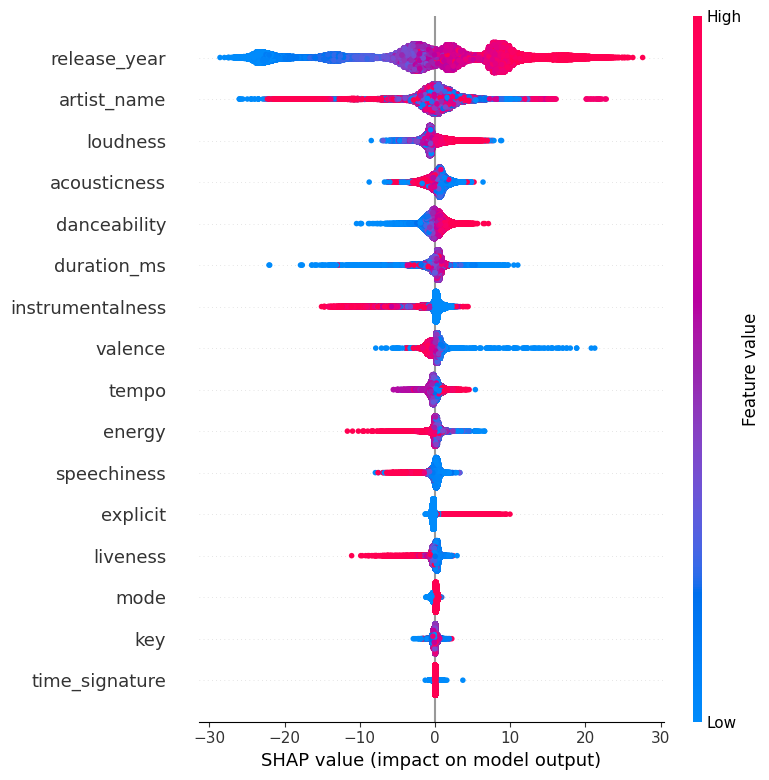

In [92]:
shap.summary_plot(shap_values, X_test)

### Feature Importance

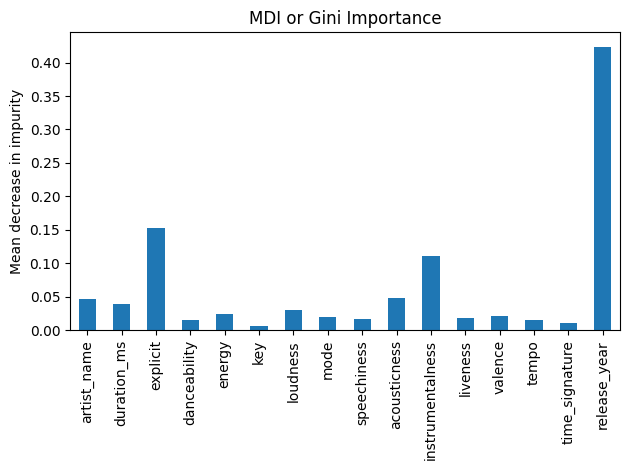

In [99]:
importances = xgb_model.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("MDI or Gini Importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Random Forest

In [40]:
randForest_model = RandomForestRegressor(n_estimators=300, n_jobs = 4)

randForest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [41]:
randForest_preds = randForest_model.predict(X_test)
np.savetxt("randForest_preds.csv", randForest_preds)

In [54]:
randForest_preds = np.loadtxt("randForest_preds.csv")

In [55]:
randForest_rmse = round(np.sqrt(mean_squared_error(y_test, randForest_preds)),2)
randForest_rmse

14.29

### Feature Importance

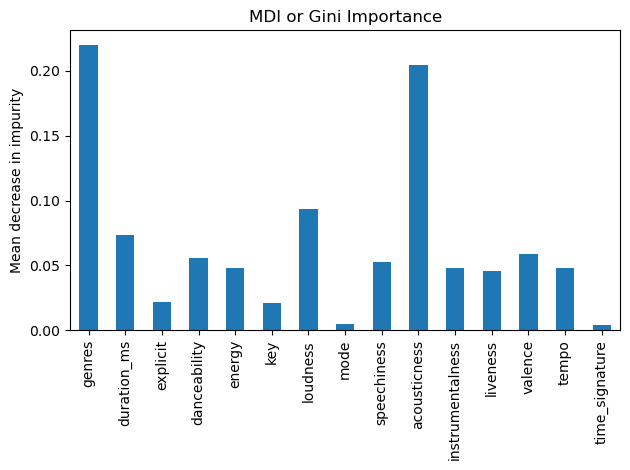

In [40]:
importances = randForest_model.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("MDI or Gini Importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SHAP

In [44]:
model = randForest_model

shap.initjs()

In [45]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

MemoryError: Unable to allocate 1.86 MiB for an array with shape (488261,) and data type int32

In [ ]:
plt.title('Shap values for RF')
shap.summary_plot(shap_values, X_train)

## AdaBoost

In [91]:
ada_model = AdaBoostRegressor(
    n_estimators=500,
    learning_rate=0.005,
    loss='square',
    random_state=42
)

ada_model.fit(X_train, y_train)

In [ ]:
ada_preds = ada_model.predict(X_test)
# np.savetxt("ada_preds.csv", ada_preds)

In [ ]:
ada_rmse = round(np.sqrt(mean_squared_error(y_test, ada_preds)),2)
ada_rmse

15.78

## LightGBM

In [76]:
lgb_model = lgb.LGBMRegressor(
    num_leaves=4,
    max_depth=5, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=1000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

lgb_model.fit(X_train, y_train)

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.


LGBMRegressor(colsample_bytree=0.95, learning_rate=0.05, max_depth=5,
              metric='mse', n_estimators=5000, n_jobs=4, num_leaves=4,
              random_state=42, silent=True, subsample=0.9)

In [77]:
lgb_preds = lgb_model.predict(X_test)
np.savetxt("lgb_preds.csv", lgb_preds)

In [78]:
lgb_rmse = round(np.sqrt(mean_squared_error(y_test, lgb_preds)),2)
lgb_rmse

14.76

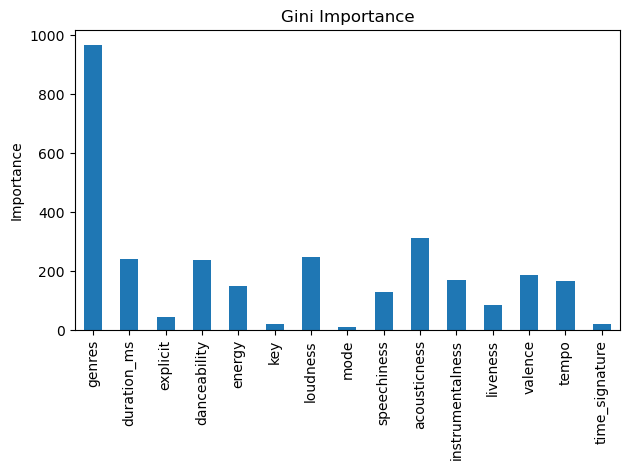

In [43]:
importances = lgb_model.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Gini Importance")
ax.set_ylabel("Importance")
fig.tight_layout()

## Catboost

In [46]:
catboost_model = CatBoostRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    thread_count=-1,
    max_depth=6,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=0.3,
    od_type="Iter",
    n_jobs = 4
)

catboost_model.fit(X_train, y_train)

In [47]:
catboost_preds = catboost_model.predict(X_test)
np.savetxt("catboost_preds.csv", catboost_preds)

In [48]:
catboost_rmse = round(np.sqrt(mean_squared_error(y_test, catboost_preds)), 2)
catboost_rmse

14.58

## KNN

In [100]:
knn_model = KNeighborsRegressor(n_neighbors=100, weights= "distance")

knn_model.fit(X_train, y_train)

knn_preds = knn_model.predict(X_test)
np.savetxt("knn_preds.csv", knn_preds)

In [101]:
knn_rmse = round(np.sqrt(mean_squared_error(y_test, knn_preds)), 2)

print("Mean Squared Error:", knn_rmse)

Mean Squared Error: 12.99


### Tuning

In [36]:
X_train.shape

(52800, 11)

In [42]:
knn_opt = BayesSearchCV(
    KNeighborsRegressor(weights="distance"),
    {
        "n_neighbors" : Integer(50, 100),
    },
    n_iter= 10,
    random_state=42,
    verbose=1
)

knn_opt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(estimator=KNeighborsRegressor(weights='distance'), n_iter=10,
              random_state=42,
              search_spaces={'n_neighbors': Integer(low=30, high=50, prior='uniform', transform='normalize')},
              verbose=1)

In [43]:
knn_opt.best_params_

OrderedDict([('n_neighbors', 47)])

Best n: 47

## SVR

In [56]:
svr_model = SVR()

svr_model.fit(X_train, y_train)

svr_preds = svr_model.predict(X_test)
np.savetxt("svr_preds.csv", svr_preds)

In [ ]:
svr_rmse = round(np.sqrt(mean_squared_error(y_test, svr_preds)), 2)

print("Mean Squared Error:", svr_rmse)

In [ ]:
svr_opt = BayesSearchCV(
    SVR(),
    {
        "C" : Real(1e-6, 1e+6, prior = "log-uniform")
    },
    n_iter = 50,
    random_state=1,
    verbose = 1
)

svr_opt.best_params_

# Stacking

## Average prediction

In [44]:
xgb_pred = np.genfromtxt("xgb_preds.csv", delimiter = ",")
randForest_preds = np.genfromtxt("randForest_preds.csv", delimiter = ",")
lgb_preds = np.genfromtxt("lgb_preds.csv", delimiter = ",")
catboost_preds = np.genfromtxt("catboost_preds.csv", delimiter = ",")
knn_preds = np.genfromtxt("knn_preds.csv", delimiter = ",")

In [113]:
pred_list = np.array([
    xgb_preds,
    randForest_preds,
    lgb_preds,
    catboost_preds,
    knn_preds
])

In [114]:
avg_preds = np.mean(pred_list, axis = 0)

round(np.sqrt(mean_squared_error(avg_preds, y_test)), 2)

14.33

## Weighted prediction

### Auto

In [66]:
rmse_vec = np.repeat(None, len(pred_list))
for i in range(len(pred_list)):
    rmse_vec[i] = np.sqrt(mean_squared_error(y_test, pred_list[i]))

min_rmse = np.min(rmse_vec)

# Take the weight vector to be a vector of best_rmse/model_rmse, that the best model have a weight of 1, and all other models a weight below 1.
# To further punish the worst models, we square all entries
weight_vec = np.square(np.reciprocal(rmse_vec)*min_rmse)


In [70]:
rmse_vec

array([14.580531904733688, 14.286047464185494, 14.763635392395782,
       14.583279663272604, 14.733450895119962], dtype=object)

In [67]:
weight_vec

array([0.9600137255881159, 1.0, 0.9363485774951689, 0.9596519911278695,
       0.9401891119065027], dtype=object)

In [68]:
weight_preds = np.repeat(0, len(y_test))
for i in range(len(weight_vec)):
    weight_preds = weight_preds + weight_vec[i]*pred_list[i]
# Normelize the prediction
weight_preds = weight_preds/np.sum(weight_vec)

In [69]:
round(np.sqrt(mean_squared_error(weight_preds, y_test)), 2)

14.33

Worse than only random forest

### Optimized

#### Overfit

OPS! In this part we defently overfit the data, meaning the prediction result is to optimistic. To do this properly, we need to optimize on a validation set and test on a test set.

In [75]:
# y_test_sub, y_valid = train_test_split(y_test, train_size=0.5, random_state=42)

In [115]:
def f(weights):
    valid_preds = np.average(pred_list, axis=0, weights=weights)
    return valid_preds

def loss_function(weights):
    valid_preds = f(weights)
    loss = mean_squared_error(valid_preds, y_test)
    return loss
    

In [116]:
opt_weights = optimize.minimize(loss_function,
                                [1/len(pred_list)] * len(pred_list),
                                constraints=({'type': 'eq','fun': lambda w: 1-sum(w)}),
                                bounds=[(0.0, 1.0)] * len(pred_list),
                                options = {'ftol':1e-10},
                            )['x']

In [117]:
opt_weights

array([0.06792161, 0.6222495 , 0.        , 0.19003296, 0.11979592])

Random forest get weighted above 60%, while lightGBM has a weight of zero.

In [109]:
weight_preds = f(opt_weights)

In [110]:
round(np.sqrt(mean_squared_error(weight_preds, y_test)), 2)

14.23

#### CV


In [49]:
xgb_model = xgb.XGBRegressor(
    n_estimators = 1000, 
    learning_rate = 0.05,
    )

randForest_model = RandomForestRegressor(n_estimators=300, n_jobs = -1)

ada_model = AdaBoostRegressor(
    n_estimators=500,
    learning_rate=0.005,
    loss='square',
    random_state=42
)

lgb_model = lgb.LGBMRegressor(
    num_leaves=4,
    max_depth=5, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=-1, 
    n_estimators=1000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

catboost_model = CatBoostRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    thread_count=-1,
    max_depth=6,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=0.3,
    od_type="Iter"
)

knn_model = KNeighborsRegressor(n_neighbors=100, weights= "distance") 

svr_model = SVR()

In [50]:
model_list = [xgb_model, randForest_model, lgb_model, catboost_model, knn_model]

In [56]:
ss = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
final_weights = np.repeat(0, len(model_list))

for train_index, valid_index in ss.split(X_train):
    X_train_sub = X_train.iloc[train_index]
    y_train_sub = y_train[train_index]
    X_valid = X_train.iloc[valid_index]
    y_valid = y_train[valid_index]
    
    pred_list = []
    for model in model_list:
        model.fit(X_train_sub, y_train_sub)
        preds = model.predict(X_valid)
        pred_list.append(preds)
    
    def f(weights):
        valid_preds = np.average(pred_list, axis=0, weights=weights)
        return valid_preds

    def loss_function(weights):
        valid_preds = f(weights)
        loss = mean_squared_error(valid_preds, y_valid)
        return loss
    
    opt_weights = optimize.minimize(loss_function,
                                [1/len(pred_list)] * len(pred_list),
                                constraints=({'type': 'eq','fun': lambda w: 1-sum(w)}),
                                bounds=[(0.0, 1.0)] * len(pred_list),
                                options = {'ftol':1e-10},
                            )['x']
    final_weights = final_weights + 0.2*opt_weights
    
    
np.savetxt("final_weights.csv", final_weights)

### By eye 

In [89]:
weight_preds = 0.5*randForest_preds + 0.2*catboost_preds + 0.1*xgb_preds + 0*lgb_preds + 0.2*knn_preds

In [90]:
round(np.sqrt(mean_squared_error(weight_preds, y_test)), 2)

14.23

It performce slightly better than pure random forest!

## True Stacking

In [40]:
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 42 # for reproducibility
NFOLDS = 5 # set number of folds for out-of-fold prediction
kf = KFold(
    n_splits=NFOLDS,
    shuffle=True,
    random_state=SEED
) # K-Folds cross-validator

# oof = out of fold
def get_oof(clf, x_train, y_train, x_test):
    """
    Popular function on Kaggle.
    
    Trains a classifier on 4/5 of the training data and
    predicts the rest (1/5). This procedure is repeated for all 5 folds,
    thus we have predictions for all training set. This prediction is one
    column of meta-data, later on used as a feature column by a meta-algorithm.
    We predict the test part and average predictions across all 5 models.
    
    Keyword arguments:
    clf -- classifier
    x_train -- 4/5 of training data
    y_train -- corresponding labels
    x_test -- all test data
    
    """
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

### Models

In [37]:
xgb_model = xgb.XGBRegressor(
    n_estimators = 1000, 
    learning_rate = 0.05,
    )

randForest_model = RandomForestRegressor(n_estimators=300, n_jobs = 4)

ada_model = AdaBoostRegressor(
    n_estimators=500,
    learning_rate=0.005,
    loss='square',
    random_state=42
)

lgb_model = lgb.LGBMRegressor(
    num_leaves=4,
    max_depth=5, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=1000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

catboost_model = CatBoostRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    thread_count=-1,
    max_depth=6,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=0.3,
    od_type="Iter"
)

knn_model = KNeighborsRegressor(n_neighbors=100, weights= "distance") # From tuning

svr_model = SVR()


In [33]:
xgb_oof_train, xgb_oof_test = get_oof(xgb_model, X_train, y_train, X_test)

rf_oof_train, rf_oof_test = get_oof(randForest_model, X_train, y_train, X_test)

lgbm_oof_train, lgbm_oof_test = get_oof(lgb_model, X_train, y_train, X_test)

cat_oof_train, cat_oof_test = get_oof(catboost_model, X_train, y_train, X_test)

knn_oof_train, knn_oof_test = get_oof(knn_model, X_train, y_train, X_test)

svr_oof_train, svr_oof_test = get_oof(svr_model, X_train, y_train, X_test)

iteritems is deprecated and will be removed in a future version. Use .items instead.


In [41]:
xgb_oof_train, xgb_oof_test = get_oof(xgb_model, X_train, y_train, X_test)

In [42]:
rf_oof_train, rf_oof_test = get_oof(randForest_model, X_train, y_train, X_test)

In [43]:
lgbm_oof_train, lgbm_oof_test = get_oof(lgb_model, X_train, y_train, X_test)

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.


In [44]:
cat_oof_train, cat_oof_test = get_oof(catboost_model, X_train, y_train, X_test)

In [45]:
knn_oof_train, knn_oof_test = get_oof(knn_model, X_train, y_train, X_test)

In [ ]:
svr_oof_train, svr_oof_test = get_oof(svr_model, X_train, y_train, X_test)

In [46]:
x_train = np.concatenate((
    xgb_oof_train,
    rf_oof_train,
    lgbm_oof_train,
    cat_oof_train,
    knn_oof_train
), axis=1)

x_test = np.concatenate((
    xgb_oof_test,
    rf_oof_test,
    lgbm_oof_test,
    cat_oof_test,
    knn_oof_test
), axis=1)

In [ ]:
meta_test = pd.DataFrame(x_test, columns=['XGB', 'RF', 'Lgbm', 'Cat', "Knn"])
meta_df.to_csv("meta_test.csv")

In [47]:
meta_df = pd.DataFrame(x_train, columns=['XGB', 'RF', 'Lgbm', 'Cat', "Knn"])
meta_df['label'] = np.array(y_train)
meta_df.to_csv("meta_df.csv")
meta_df

XGB         RF       Lgbm        Cat        Knn  label
0       27.816879  25.520833  26.176168  26.568750  27.995858     21
1       33.172192  38.745000  33.642203  34.180600  34.982868     26
2       18.827854  22.391667  19.299977  18.779628  22.379187     47
3       38.112213  39.450556  39.241550  38.408647  38.440774     36
4       28.983570  32.106667  25.139920  31.183518  26.974208     52
...           ...        ...        ...        ...        ...    ...
469332  47.968945  46.670357  43.941568  49.303848  40.209951     44
469333  29.995770  27.610667  29.734513  30.449416  32.637132     10
469334  24.612436  23.300000  26.135566  24.699583  21.055662     33
469335  56.245197  59.332167  53.685128  58.127962  53.554070     64
469336  10.227145  14.197333  13.631235  12.099176  17.507743      0

[469337 rows x 6 columns]

In [118]:
meta_df = pd.read_csv("meta_df.csv")

In [119]:
x_train = meta_df[['XGB', 'RF', 'Lgbm', 'Cat', "Knn"]]
y_train = meta_df["label"]

### Random forest

In [48]:
meta_model1 = RandomForestRegressor(n_estimators=300, n_jobs = 4)

meta_model1.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300)

In [49]:
meta_preds1 = meta_model1.predict(x_test)

In [50]:
meta_rmse = round(np.sqrt(mean_squared_error(meta_preds1, y_test)), 2)
meta_rmse

14.46

In [52]:
np.savetxt("meta_preds1.csv", meta_preds1)

### Ridge

In [120]:
meta_model2 = Ridge().fit(x_train, y_train)

In [123]:
meta_preds2 = meta_model2.predict(x_test)

NameError: name 'x_test' is not defined

In [124]:
meta_rmse2 = round(np.sqrt(mean_squared_error(meta_preds2, y_test)), 2)
meta_rmse2

NameError: name 'meta_preds2' is not defined

# Glass Box Models

## Linear Regression Statmodels

In [51]:
lin_model = sm.OLS(y_train, X_train)

lin_fit = lin_model.fit()

print(lin_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.069
Model:                            OLS   Adj. R-squared (uncentered):              0.069
Method:                 Least Squares   F-statistic:                              354.6
Date:                Wed, 22 Feb 2023   Prob (F-statistic):                        0.00
Time:                        11:55:39   Log-Likelihood:                     -2.5797e+05
No. Observations:               52800   AIC:                                  5.160e+05
Df Residuals:                   52789   BIC:                                  5.161e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [52]:
lin_preds = lin_fit.predict(X_test)

In [53]:
lin_rmse = round(np.sqrt(mean_squared_error(y_test, lin_preds)), 2)

print("Mean Squared Error:", lin_rmse)

Mean Squared Error: 31.79


## Linear Regression Sklearn

In [71]:
lin_sk_fit = LinearRegression().fit(X_train, y_train)

In [72]:
lin_sk_preds = lin_sk_fit.predict(X_test)

In [73]:
lin_sk_rmse = round(np.sqrt(mean_squared_error(y_test, lin_sk_preds)), 2)

print("Mean Squared Error:", lin_sk_rmse)

Mean Squared Error: 16.13


## Ridge

In [101]:
ridge_fit = Ridge().fit(X_train, y_train)

In [102]:
ridge_preds = ridge_fit.predict(X_test)

In [103]:
ridge_rmse = round(np.sqrt(mean_squared_error(y_test, ridge_preds)), 2)

print("Mean Squared Error:", ridge_rmse)

Mean Squared Error: 16.13


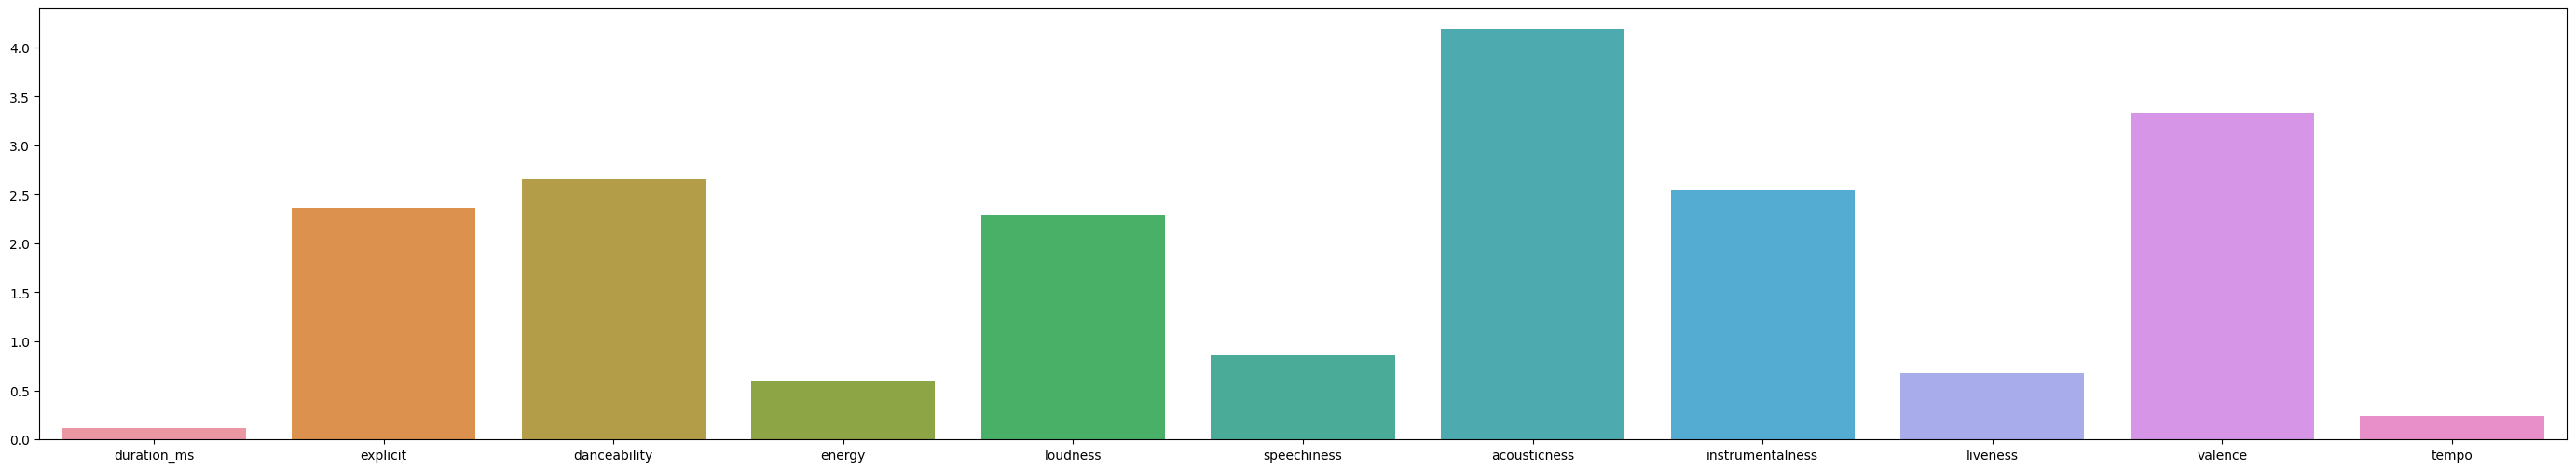

In [96]:
plt.figure(figsize=(35, 6))
names = ridge_fit.feature_names_in_
values = list(abs(ridge_fit.coef_)) # Take absolute value to find the importance of the variable


sns.barplot(x = names, y = values)
plt.show()

## Lasso

In [91]:
lasso_fit = Lasso().fit(X_train, y_train)

In [92]:
lasso_preds = lasso_fit.predict(X_test)

In [93]:
lasso_rmse = round(np.sqrt(mean_squared_error(y_test, lasso_preds)), 2)

print("Mean Squared Error:", lasso_rmse)

Mean Squared Error: 16.34


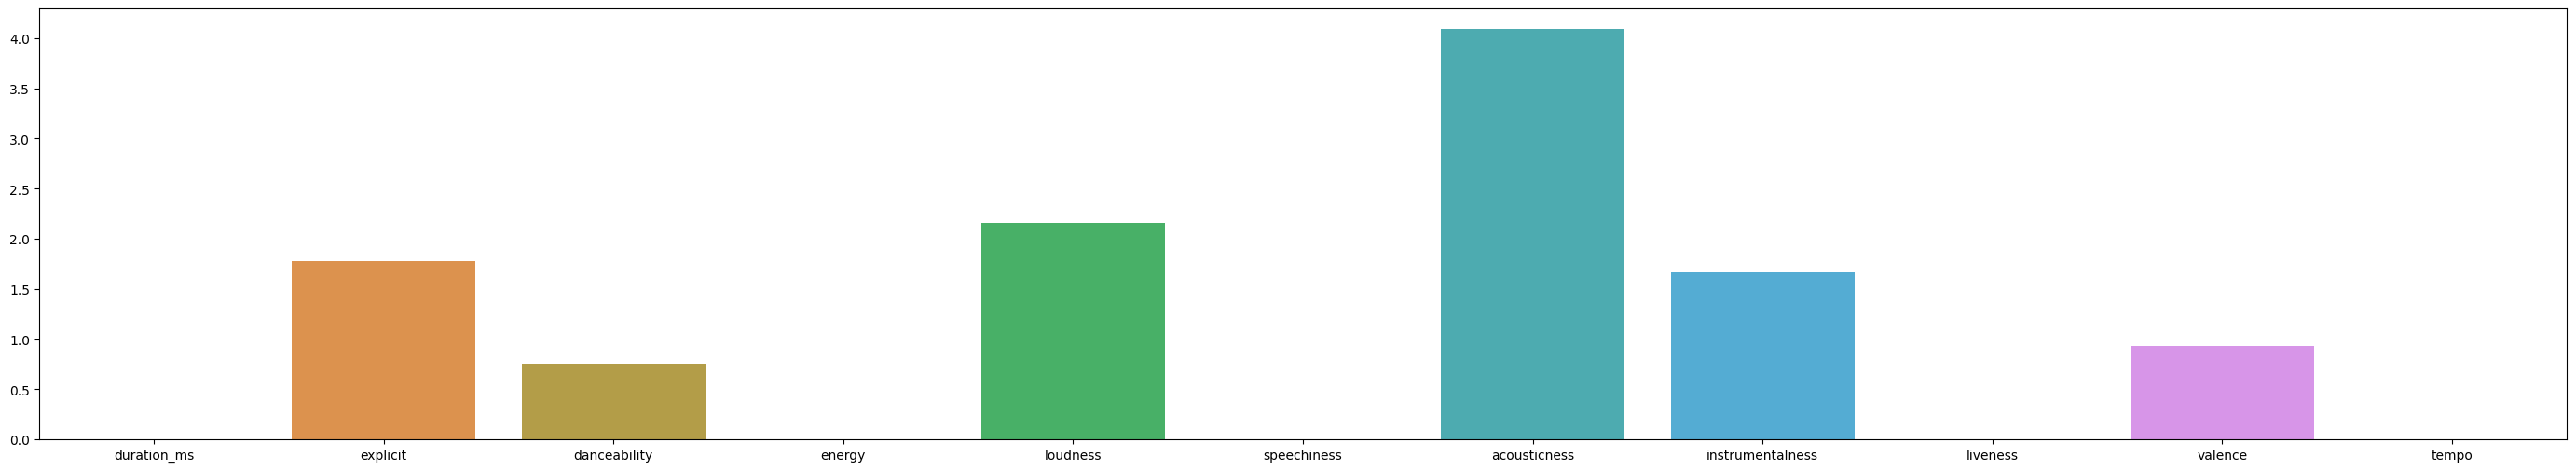

In [95]:
plt.figure(figsize=(35, 6))
names = lasso_fit.feature_names_in_
values = list(abs(lasso_fit.coef_)) # Take absolute value to find the importance of the variable


sns.barplot(x = names, y = values)
plt.show()

## Tweedie

In [92]:
tweed_fit = TweedieRegressor(power = 1).fit(X_train, y_train)

In [93]:
tweed_preds = tweed_fit.predict(X_test)

In [87]:
tweed_rmse = round(np.sqrt(mean_squared_error(y_test, tweed_preds)), 2)

print("Mean Squared Error:", tweed_rmse)

Mean Squared Error: 16.09


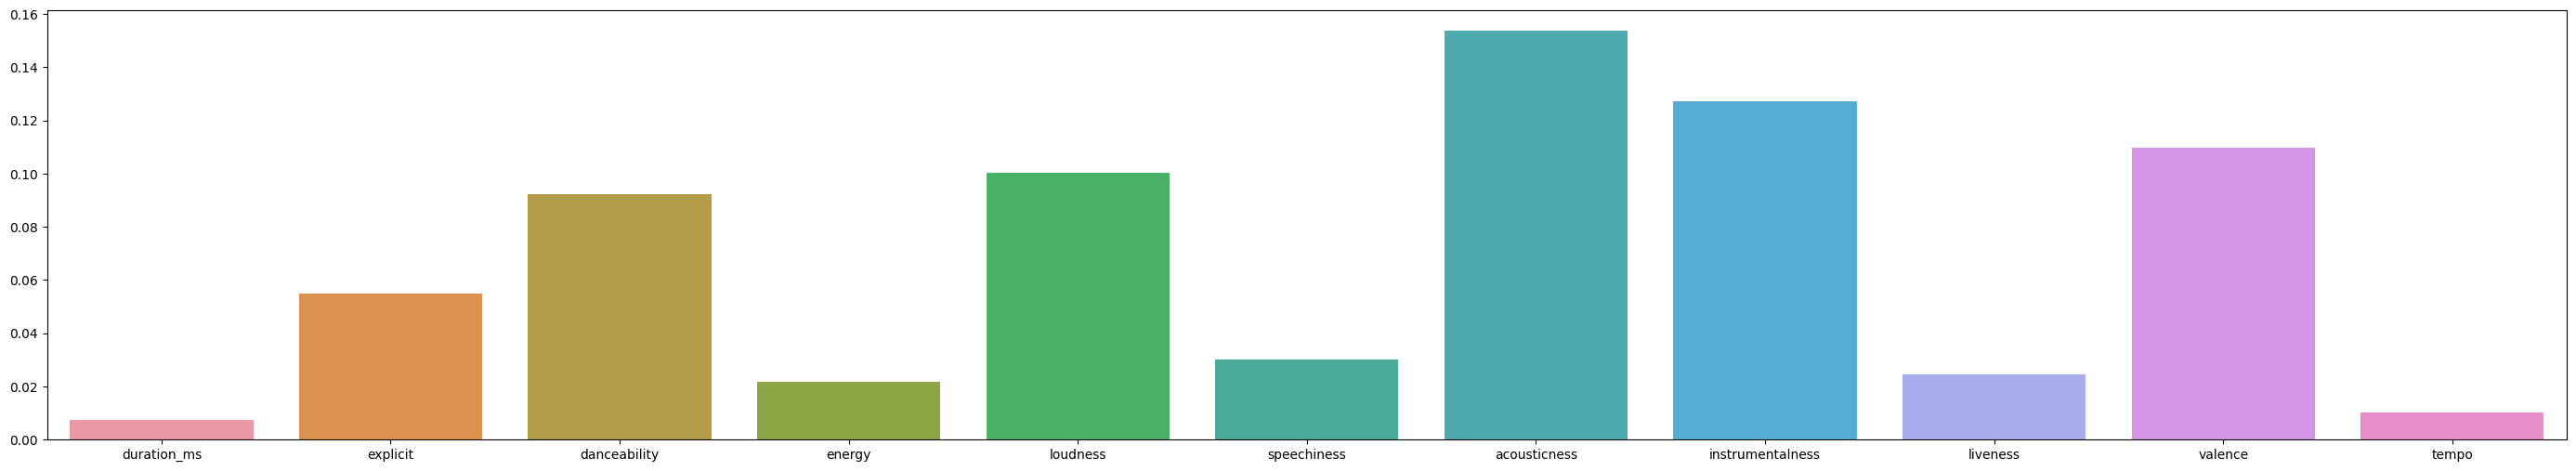

In [97]:
plt.figure(figsize=(35, 6))
names = tweed_fit.feature_names_in_
values = list(abs(tweed_fit.coef_)) # Take absolute value to find the importance of the variable


sns.barplot(x = names, y = values)
plt.show()

## Decision Tree

In [165]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [166]:
tree_preds = tree_model.predict(X_test)

In [167]:
tree_rmse = round(np.sqrt(mean_squared_error(y_test, tree_preds)), 2)

print("Mean Squared Error:", tree_rmse)

Mean Squared Error: 20.33


## Linear Tree

pip install --upgrade linear-tree

In [169]:
linTree_model = LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=20)
linTree_model.fit(X_train, y_train)

LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=20)

In [170]:
linTree_preds = linTree_model.predict(X_test)

In [171]:
linTree_rmse = round(np.sqrt(mean_squared_error(y_test, linTree_preds)), 2)

print("Mean Squared Error:", linTree_rmse)

Mean Squared Error: 15.35


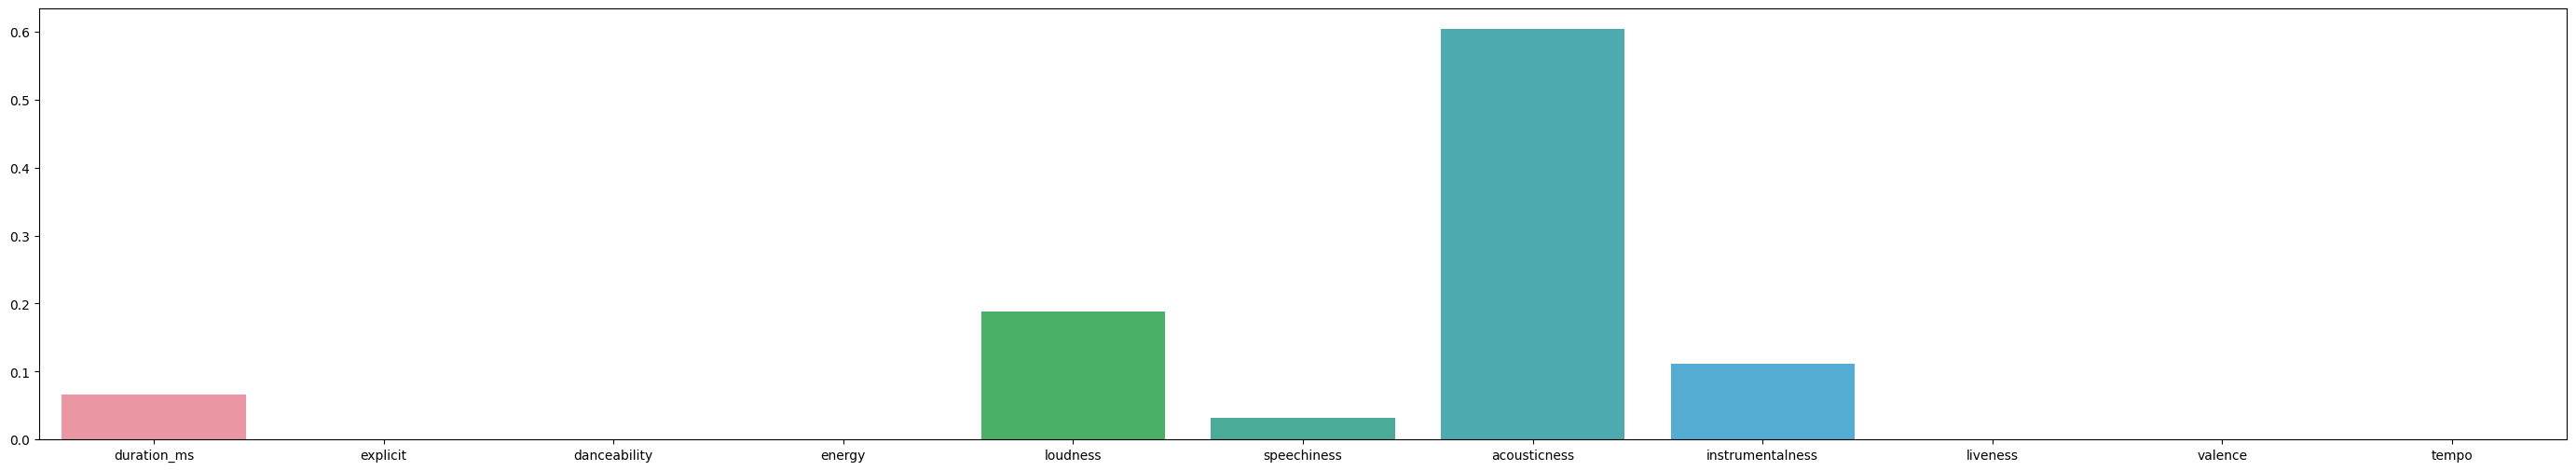

In [172]:
plt.figure(figsize=(35, 6))
names = linTree_model.feature_names_in_
values = linTree_model.feature_importances_

sns.barplot(x = names, y = values)
plt.show()

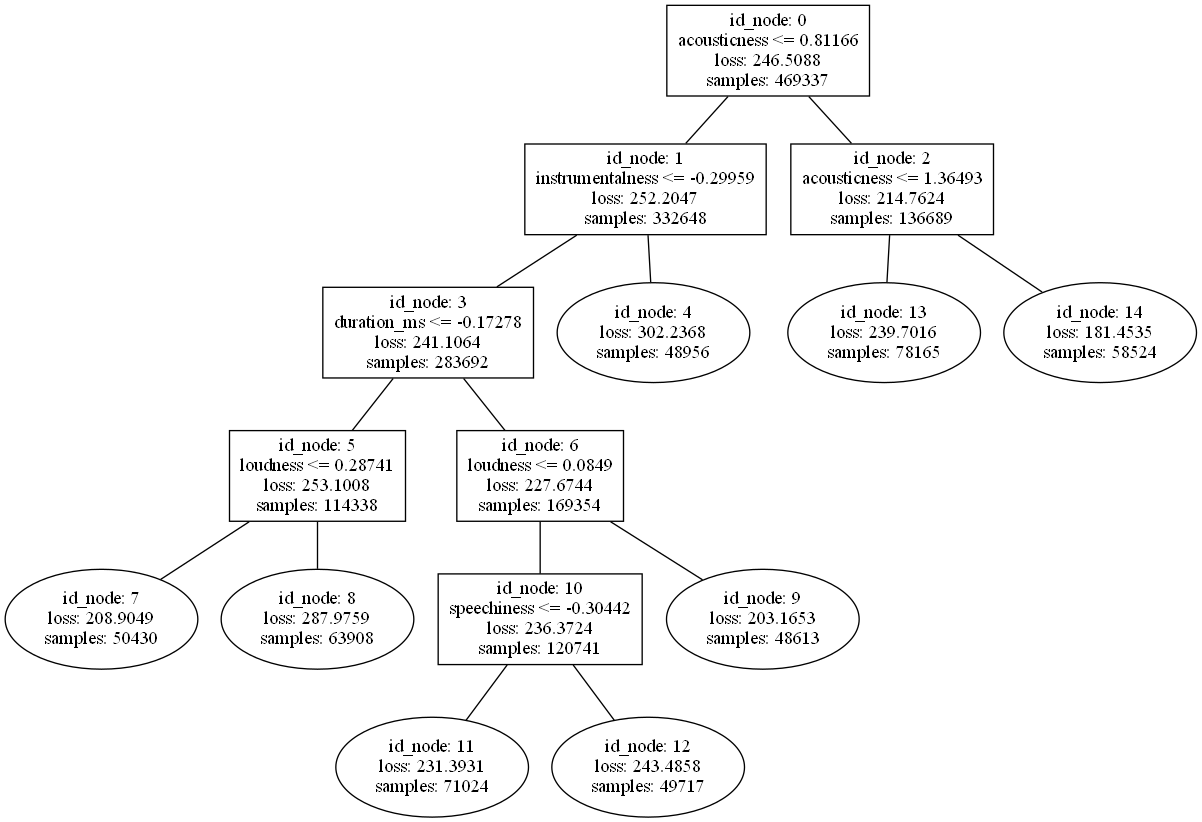

In [173]:
linTree_model.plot_model(feature_names=linTree_model.feature_names_in_)

## Explainable Boosting Machine

In [75]:
ebm = ExplainableBoostingRegressor(random_state = 42)
ebm.fit(X_train, y_train)

ebm_preds = ebm.predict(X_test)

In [76]:
ebm_rmse = round(np.sqrt(mean_squared_error(y_test, ebm_preds)), 2)

print("Mean Squared Error:", ebm_rmse)

Mean Squared Error: 15.04


In [88]:
ebm_global = ebm.explain_global()
show(ebm_global)

INFO:interpret.visual.udash:Generated mini dash


<!-- http://127.0.0.1:7001/2062154257312/ -->

In [89]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5])
show(ebm_local)

INFO:interpret.visual.udash:Generating mini dash
INFO:interpret.visual.udash:Generated mini dash


<!-- http://127.0.0.1:7001/2061646532464/ -->